# Data Cleaning

In [323]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [8]:
!ls data

archive                    only_dead.xlsx
game-of-thones-deaths.xlsx


## Game of thrones deaths (only_deaths dataset)

https://www.kaggle.com/datasets/shitalgaikwad123/gameofthonesdeaths

In [15]:
only_deaths = pd.read_excel('data/only_dead.xlsx', skiprows=1)

In [298]:
only_deaths_original = pd.read_excel('data/only_dead.xlsx', skiprows=1)

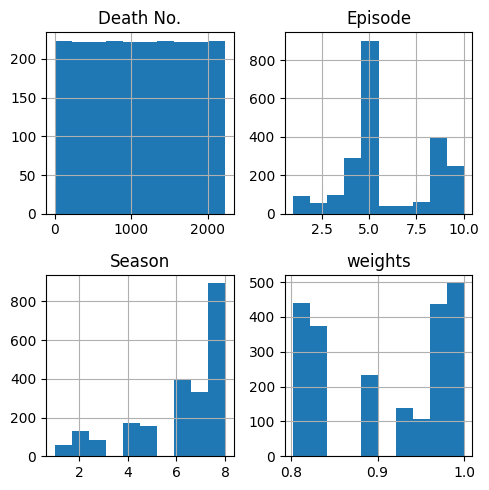

In [328]:
only_deaths_original.hist(figsize = (5, 5))

plt.tight_layout()

In [334]:
only_deaths_original.dtypes

Allegiance        object
Death No.          int64
Episode            int64
Killer            object
Killers House     object
Location          object
Method            object
Name              object
Season             int64
weights          float64
dtype: object

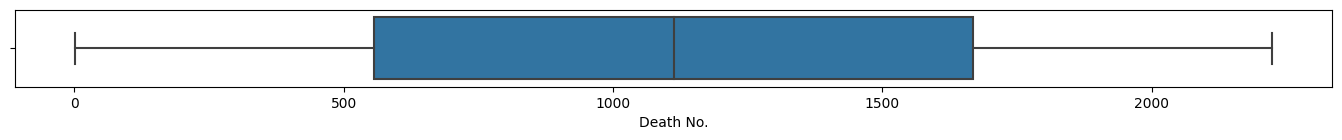

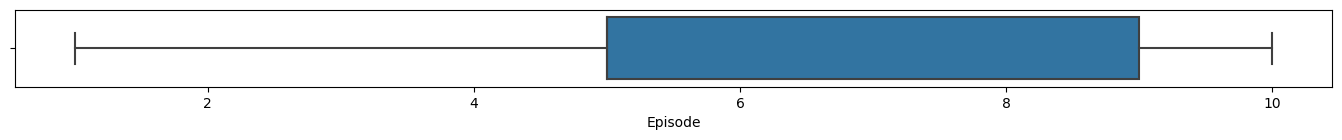

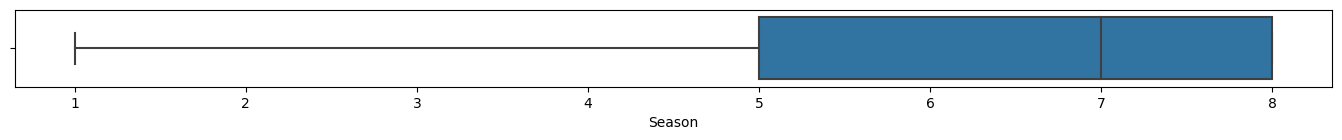

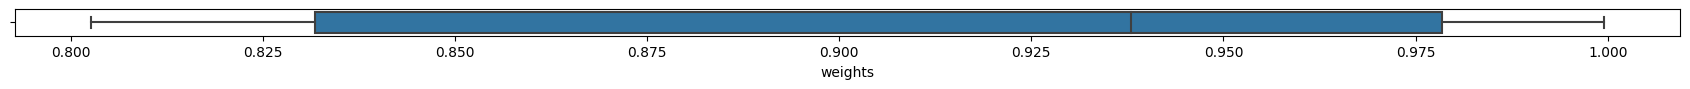

In [338]:

only_deaths_original_numeric=only_deaths_original.select_dtypes(exclude=['object'])
for column in only_deaths_original_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=only_deaths_original, x=column)
plt.tight_layout()

In [16]:
only_deaths

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [28]:
only_deaths_shape = only_deaths.shape
only_deaths_shape

(2224, 9)

In [26]:
only_deaths_cols = only_deaths.columns
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [30]:
only_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Allegiance     2224 non-null   object
 1   Death No.      2224 non-null   int64 
 2   Episode        2224 non-null   int64 
 3   Killer         2224 non-null   object
 4   Killers House  2224 non-null   object
 5   Location       2224 non-null   object
 6   Method         2224 non-null   object
 7   Name           2224 non-null   object
 8   Season         2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [32]:
only_deaths.duplicated().sum()

0

In [34]:
only_deaths.isna().sum()

Allegiance       0
Death No.        0
Episode          0
Killer           0
Killers House    0
Location         0
Method           0
Name             0
Season           0
dtype: int64

In [43]:
for col in only_deaths_cols:
    print(col,'   nunique:',len(only_deaths[col].value_counts()))
    print('/n')
    print(only_deaths[col].value_counts())
    print('/n')

Allegiance    nunique: 41
/n
House Lannister                      835
None                                 432
House Stark                          121
Free Folk                            121
Night's Watch                         79
House Bolton                          68
Sons of the Harpy                     68
House Targaryen                       68
House Baratheon of Dragonstone        67
House Frey                            62
Faith Militant                        52
Smallfolk                             44
House Greyjoy                         41
Dothraki                              23
House Baratheon of King's Landing     22
The Masters                           14
The Thirteen                          12
Wise Masters                          12
Brotherhood Without Banners           10
House Mormont                          8
House Martell                          8
Good Masters                           7
House Baelish                          6
Great Masters               

In [44]:
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [45]:
only_deaths_shape

(2224, 9)

In [71]:
#get rows that have "King's Landing" on name
only_deaths['Name'].str.contains("King's Landing").sum()


389

In [109]:
only_deaths_cols = only_deaths.columns

In [111]:
only_deaths_cols_without_deathno = only_deaths_cols.copy().to_list()


In [112]:
only_deaths_cols_without_deathno

['Allegiance',
 'Death No.',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [114]:
only_deaths_cols_without_deathno.remove('Death No.')

In [115]:
only_deaths_cols

Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'Name', 'Season'],
      dtype='object')

In [116]:
only_deaths_cols_without_deathno

['Allegiance',
 'Episode',
 'Killer',
 'Killers House',
 'Location',
 'Method',
 'Name',
 'Season']

In [121]:
only_deaths.duplicated(subset=only_deaths_cols_without_deathno).sum()

1737

In [124]:
only_deaths.shape

(2224, 9)

In [125]:
only_deaths_wo_deathno = only_deaths.drop('Death No.',axis=1)

In [129]:
only_deaths_wo_deathno.duplicated().sum()

1737

In [130]:
2224-1737

487

In [469]:
only_deaths_wo_deathno

,Allegiance,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...
2219,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [470]:
only_deaths_wo_deathno.Episode.value_counts()

5     899
9     400
4     292
10    249
3      96
1      90
8      60
2      56
6      42
7      40
Name: Episode, dtype: int64

In [471]:
only_deaths_wo_deathno.Season.value_counts()

8    892
6    396
7    334
4    170
5    158
2    130
3     86
1     58
Name: Season, dtype: int64

In [488]:

# Function to calculate number of episode in total, not per season
def calculate_global_episode(row):
    if row['Season'] == 1:
        return row['Episode']
    elif row['Season'] == 2:
        return 10 + row['Episode']
    elif row['Season'] == 3:
        return 20 + row['Episode']
    elif row['Season'] == 4:
        return 30 + row['Episode']
    elif row['Season'] == 5:
        return 40 + row['Episode']
    elif row['Season'] == 6:
        return 50 + row['Episode']
    elif row['Season'] == 7:
        return 60 + row['Episode']
    elif row['Season'] == 8:
        return 67 + row['Episode']




In [489]:
only_deaths_wo_deathno['episode_global_num'] = only_deaths_wo_deathno.apply(calculate_global_episode, axis=1)


#

In [491]:
only_deaths_wo_deathno.episode_global_num.max()

73

In [496]:
only_deaths_original.shape, only_deaths_original.columns

((2224, 11),
 Index(['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
        'Location', 'Method', 'Name', 'Season', 'weights', 'corrected_weights'],
       dtype='object'))

In [497]:
only_deaths_wo_deathno.shape, only_deaths_wo_deathno.columns

((2224, 9),
 Index(['Allegiance', 'Episode', 'Killer', 'Killers House', 'Location',
        'Method', 'Name', 'Season', 'episode_global_num'],
       dtype='object'))

In [498]:
## Calculate weight_simple
# Calculate frequency
frequency = only_deaths_wo_deathno['Name'].value_counts()

# Calculate total observations
total_observations = len(only_deaths_wo_deathno)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to 
weights = inverse_percentage/100

# Map weights back to the original dataframe
only_deaths_wo_deathno['weights_simple'] = only_deaths_wo_deathno['Name'].map(weights)


In [503]:
only_deaths_wo_deathno.weights_simple.min(), only_deaths_wo_deathno.weights_simple.max()

(0.8026079136690647, 0.9995503597122303)

<AxesSubplot:>

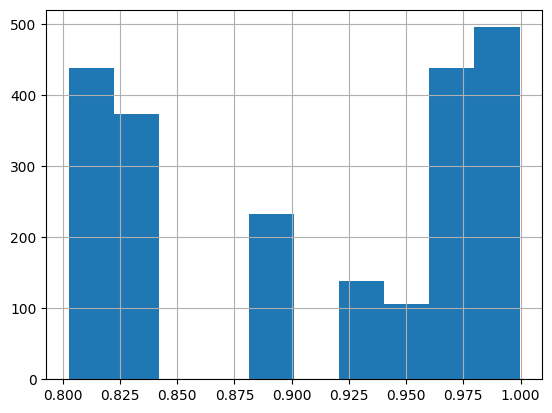

In [502]:
only_deaths_wo_deathno.weights_simple.hist()

In [506]:
only_deaths_wo_deathno.drop(labels=['Episode', 'Season'], axis=1, inplace=True)

In [516]:
only_deaths_wo_deathno.columns = list(map(str.lower,['Allegiance', 'Killer', 'Killers_House', 'Location', 'Method', 'Name',
       'episode_global_num', 'weights_simple']))



In [518]:
#write csv isAlive_updated

#only_deaths_wo_deathno.to_csv('data/20231128_only_deaths_ep_weights.csv')

In [525]:
only_deaths_wo_deathno.shape

(2224, 8)

In [523]:
only_deaths_wo_deathno.duplicated().sum()

1737

In [526]:
2224-1737

487

## Character-deaths 
https://www.kaggle.com/datasets/mylesoneill/game-of-thrones/data


two datasets: 
- character-deaths.csv
- **character-predictions.csv --> death until season 4**

### character-deaths.csv

In [17]:
char_deaths = pd.read_csv('data/archive/character-deaths.csv')


In [296]:
char_deaths_original = pd.read_csv('data/archive/character-deaths.csv')

In [560]:
char_deaths_original.shape

(917, 13)

In [18]:
char_deaths

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [51]:
char_deaths.shape

(917, 13)

In [208]:
char_deaths.isna().sum()

Name                    0
Allegiances             0
Death Year            612
Book of Death         610
Death Chapter         618
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64

### character-predictions.csv

The **‘actual’** column contains the life or death state of the characters in the books.

The **‘pred’** column contains the prediction of whether a character will live or die.

The **‘alive’** column contains the probability of a character to stay alive.

The **‘plod’** column contains the probability of a character’s death.

In [210]:
char_preds = pd.read_csv('data/archive/character-predictions.csv')

In [297]:
char_preds_original = pd.read_csv('data/archive/character-predictions.csv')

In [144]:
char_preds_cols = char_preds.columns
char_preds_cols

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath',
       'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2',
       'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='object')

In [161]:
char_preds

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [211]:
char_preds_droped_cols=['S.No', 'pred', 'actual','alive','plod']

In [143]:
char_preds_shape = char_preds.shape
char_preds_shape

(1946, 28)

In [145]:
char_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   title              938 non-null    object 
 2   male               1946 non-null   int64  
 3   culture            677 non-null    object 
 4   dateOfBirth        433 non-null    float64
 5   DateoFdeath        444 non-null    float64
 6   mother             21 non-null     object 
 7   father             26 non-null     object 
 8   heir               23 non-null     object 
 9   house              1519 non-null   object 
 10  spouse             276 non-null    object 
 11  book1              1946 non-null   int64  
 12  book2              1946 non-null   int64  
 13  book3              1946 non-null   int64  
 14  book4              1946 non-null   int64  
 15  book5              1946 non-null   int64  
 16  isAliveMother      21 no

In [212]:
char_preds_droped_cols = char_preds_droped_cols + ['isPopular','culture','dateOfBirth','DateoFdeath', 'age', 'title','mother','father','heir','spouse','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse']

In [213]:
char_preds.drop(labels=char_preds_droped_cols, axis=1, inplace=True)

In [214]:
char_preds.duplicated().sum()

0

** Deleted: culture,dateOfBirth,DateoFdeath,age**

We could keep them only if the webscrapping can fill the NAs

Feature               NAs

culture              1269

dateOfBirth          1513

DateoFdeath          1502

age                  1513

We leave the culture for the age character history but not for the model prediction

In [215]:
#char_preds.culture.value_counts()

In [216]:
char_preds.house.value_counts()

Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 347, dtype: int64

In [217]:
char_preds["house"]=char_preds["house"].fillna("No house")

In [218]:
char_preds.isna().sum()

name                 0
male                 0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
numDeadRelations     0
boolDeadRelations    0
popularity           0
isAlive              0
dtype: int64

<AxesSubplot:>

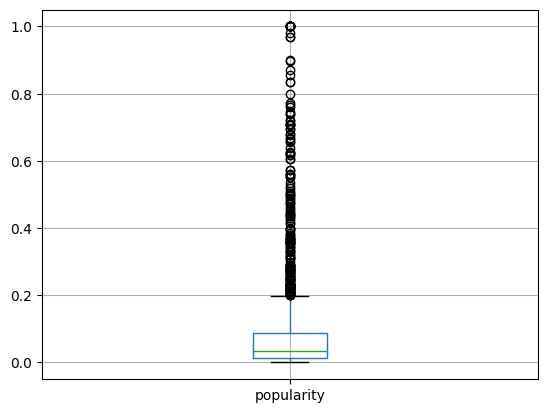

In [246]:
char_preds.boxplot("popularity")

<AxesSubplot:>

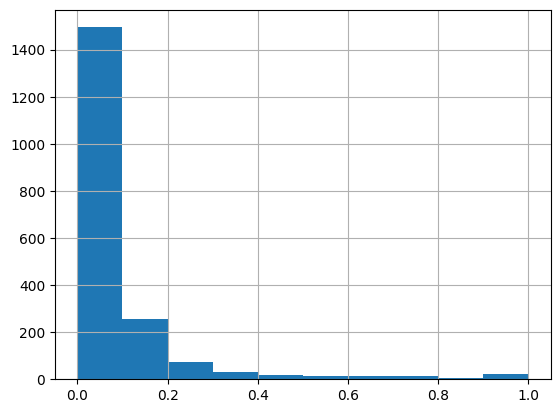

In [222]:
char_preds.popularity.hist()

In [225]:
#char_preds.to_csv('data/20231127_char_pred.csv')  

In [227]:
#!ls data

20231127_char_pred.csv     game-of-thones-deaths.xlsx
archive                    only_dead.xlsx


In [229]:
char_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1946 non-null   object 
 1   male               1946 non-null   int64  
 2   house              1946 non-null   object 
 3   book1              1946 non-null   int64  
 4   book2              1946 non-null   int64  
 5   book3              1946 non-null   int64  
 6   book4              1946 non-null   int64  
 7   book5              1946 non-null   int64  
 8   isMarried          1946 non-null   int64  
 9   isNoble            1946 non-null   int64  
 10  numDeadRelations   1946 non-null   int64  
 11  boolDeadRelations  1946 non-null   int64  
 12  popularity         1946 non-null   float64
 13  isAlive            1946 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 213.0+ KB


In [231]:
char_preds.male.value_counts()

1    1205
0     741
Name: male, dtype: int64

In [232]:
char_preds.house.value_counts()

No house           427
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 348, dtype: int64

In [233]:
char_preds.book1.value_counts()

0    1560
1     386
Name: book1, dtype: int64

In [234]:
char_preds.book2.value_counts()

0    1217
1     729
Name: book2, dtype: int64

In [235]:
char_preds.book3.value_counts()

0    1011
1     935
Name: book3, dtype: int64

In [236]:
char_preds.book4.value_counts()

1    1152
0     794
Name: book4, dtype: int64

In [237]:
char_preds.book5.value_counts()

0    1177
1     769
Name: book5, dtype: int64

In [240]:
char_preds.isAlive.value_counts()/len(char_preds)

1    0.745632
0    0.254368
Name: isAlive, dtype: float64

In [241]:
char_preds.numDeadRelations.value_counts()

0     1801
1       49
5       25
4       18
2       12
7       10
6        8
10       5
8        5
3        4
11       3
12       2
15       2
9        2
Name: numDeadRelations, dtype: int64

<AxesSubplot:>

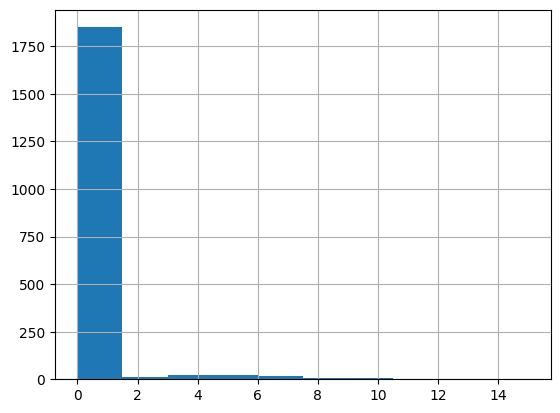

In [242]:
char_preds.numDeadRelations.hist()

<AxesSubplot:>

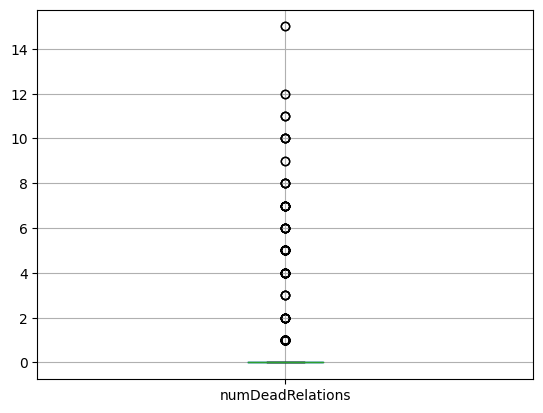

In [247]:
char_preds.boxplot("numDeadRelations")

### Getting alliance column from only_deaths.Allegiance to char_preds for each row by name

In [251]:
only_deaths.Name.nunique()

253

In [255]:
only_deaths.Name.value_counts()

Lannister soldier          439
Golden Company soldier     374
King's Landing Citizen     233
King's Landing Noble       138
Wildling                   106
                          ... 
Joyeuse Frey                 1
Catelyn Stark                1
Lowell (King's Soldier)      1
Polliver                     1
Daenerys Targaryen           1
Name: Name, Length: 253, dtype: int64

In [252]:
only_deaths.shape

(2224, 9)

In [250]:
char_preds.name.nunique()

1946

In [254]:
char_preds.shape

(1946, 14)

In [257]:
char_preds.name.value_counts()

Viserys II Targaryen        1
Otho Bracken                1
Raymund Frey                1
Raynard Ruttiger            1
Red Alyn of the Rosewood    1
                           ..
Jon Cupps                   1
Jommy                       1
Jommo                       1
Johanna Swann               1
Tytos Lannister             1
Name: name, Length: 1946, dtype: int64

In [554]:
# Checking common values
common_values_onlydeaths_char_preds = only_deaths[only_deaths['name'].isin(char_preds['name'])]

# Values in char_preds not in only_deaths
values_in_char_preds_not_in_only_deaths = char_preds[~char_preds['name'].isin(only_deaths['name'])]

# Values in only_deaths not in char_preds
values_in_only_deaths_not_in_char_preds = only_deaths[~only_deaths['name'].isin(char_preds['name'])]


In [259]:
common_values

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1
...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8


In [260]:
values_in_char_preds_not_in_only_deaths

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0
1942,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1
1944,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1


In [263]:
values_in_char_preds_not_in_only_deaths.name.nunique()

1830

In [261]:
values_in_only_deaths_not_in_char_preds

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1
6,Dothraki,7,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1
7,None,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
9,House Stark,10,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1
...,...,...,...,...,...,...,...,...,...
2218,None,2206,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [273]:
values_in_only_deaths_not_in_char_preds=values_in_only_deaths_not_in_char_preds.drop('Death No.',axis=1)

In [275]:
values_in_only_deaths_not_in_char_preds.duplicated().sum()

1737

In [276]:
values_in_only_deaths_not_in_char_preds = values_in_only_deaths_not_in_char_preds.drop_duplicates()

In [278]:
values_in_only_deaths_not_in_char_preds.shape

(370, 8)

In [279]:
values_in_only_deaths_not_in_char_preds

,Allegiance,Episode,Killer,Killers House,Location,Method,Name,Season
3,None,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,1,Stag,None,Winterfell,Antler,Direwolf,1
6,Dothraki,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1
7,None,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1
9,House Stark,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1
...,...,...,...,...,...,...,...,...
1439,House Lannister,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Golden Company soldier,8
1813,House Lannister,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8
1982,House Lannister,5,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,8
1994,House Lannister,5,Unsullied,House Targaryen,King's Landing,Spear,Lannister soldier,8


In [282]:
values_in_only_deaths_not_in_char_preds.Name.value_counts()

Wildling                   32
Night's Watch brother      24
Lannister soldier          21
Sons of the Harpy agent    19
Peasant                    19
                           ..
Leech                       1
Ros                         1
Astapor soldier             1
Astapor slaver              1
Golden Company soldier      1
Name: Name, Length: 137, dtype: int64

In [283]:
char_deaths.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [284]:

# Values in char_preds not in char_deaths
values_in_char_preds_not_in_char_deaths = char_preds[~char_preds['name'].isin(char_deaths['Name'])]

In [285]:
values_in_char_preds_not_in_char_deaths

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
5,Tommen Baratheon,1,No house,0,0,0,0,0,0,0,5,1,1.000000,1
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Rohanne Webber,0,House Webber,0,0,0,0,0,1,1,0,0,0.170569,0
1939,Meg,0,Brotherhood Without Banners,0,0,0,1,0,0,0,0,0,0.010033,1
1940,Laena Velaryon,0,House Velaryon,0,0,0,0,0,1,0,0,0,0.140468,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1


In [286]:
# Values in only_deaths not in char_preds
values_in_char_deaths_not_in_char_preds = char_deaths[~char_deaths['Name'].isin(char_preds['name'])]

In [287]:
values_in_char_deaths_not_in_char_preds

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Weeper,Wildling,NaN,NaN,NaN,7.0,1,1,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [291]:
only_deaths_wo_deathno

,Allegiance,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...
2219,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [294]:
only_deaths_wo_deathno_nodupl = only_deaths_wo_deathno.drop_duplicates()

In [295]:
only_deaths_wo_deathno_nodupl

,Allegiance,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...
1982,House Lannister,5,Grey Worm,House Targaryen,King's Landing,Spear,Lannister soldier,8
1994,House Lannister,5,Unsullied,House Targaryen,King's Landing,Spear,Lannister soldier,8
1995,House Targaryen,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8
1996,None,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [299]:
only_deaths_original

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1
...,...,...,...,...,...,...,...,...,...
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8
2222,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8


In [300]:
char_deaths_original

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [301]:
char_preds_original

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [302]:
char_preds_original.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [303]:
values_in_char_deaths_not_in_char_preds 

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Weeper,Wildling,NaN,NaN,NaN,7.0,1,1,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [304]:
values_in_char_preds_not_in_char_deaths

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
5,Tommen Baratheon,1,No house,0,0,0,0,0,0,0,5,1,1.000000,1
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Rohanne Webber,0,House Webber,0,0,0,0,0,1,1,0,0,0.170569,0
1939,Meg,0,Brotherhood Without Banners,0,0,0,1,0,0,0,0,0,0.010033,1
1940,Laena Velaryon,0,House Velaryon,0,0,0,0,0,1,0,0,0,0.140468,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1


## Inverse percentage calculation (only deaths)

In [312]:
# Calculate frequency
frequency = only_deaths_original['Name'].value_counts()

# Calculate total observations
total_observations = len(only_deaths_original)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to 
weights = inverse_percentage/100

# Map weights back to the original dataframe
only_deaths_original['weights'] = only_deaths_original['Name'].map(weights)



In [342]:
# Calculate frequency again for accuracy
frequency = only_deaths_original['Name'].value_counts()

# Grouping by the number of occurrences
grouped_weights = weights.groupby(frequency).sum()

# Dividing the weights by the number of occurrences in their respective group
for group in grouped_weights.index:
    weights[frequency == group] /= group

# Map the updated weights back to the original dataframe
only_deaths_original['corrected_weights'] = only_deaths_original['Name'].map(weights)

only_deaths_original

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,weights,corrected_weights
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550,0.999550
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1,0.999550,0.999550
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.999550,0.999550
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1,0.999550,0.999550
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1,0.999550,0.999550
...,...,...,...,...,...,...,...,...,...,...,...
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.000016
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.000016
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.000016
2222,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0.895234,0.000016


In [352]:
frequency.value_counts()

1      206
3        9
2        5
4        3
6        2
7        2
36       2
14       2
15       1
5        1
8        1
9        1
10       1
11       1
12       1
439      1
374      1
27       1
46       1
48       1
50       1
52       1
54       1
58       1
62       1
68       1
106      1
138      1
233      1
18       1
Name: Name, dtype: int64

In [347]:
only_deaths_original.sort_values(by="weights", ascending=False )

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,weights,corrected_weights
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550,0.999550
338,House Martell,339,8,"Gregor ""the Mountain"" Clegane",House Lannister,King's Landing,Hands,Oberyn Martell,4,0.999550,0.999550
439,Smallfolk,440,10,Daenerys Targaryen,House Targaryen,Meereen,Dragonfire (Dragon),Zalla,4,0.999550,0.999550
414,Free Folk,415,9,Olly,Night's Watch,Castle Black,Arrow,Ygritte,4,0.999550,0.999550
413,Free Folk,414,9,Jon Snow,House Stark,Castle Black,Hammer,Styr,4,0.999550,0.999550
...,...,...,...,...,...,...,...,...,...,...,...
1927,House Lannister,1898,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.000004
1926,House Lannister,1897,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.000004
1925,House Lannister,1896,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.000004
1924,House Lannister,1895,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),Lannister soldier,8,0.802608,0.000004


In [317]:
only_deaths_original.weights.min()

0.8026079136690647

<AxesSubplot:>

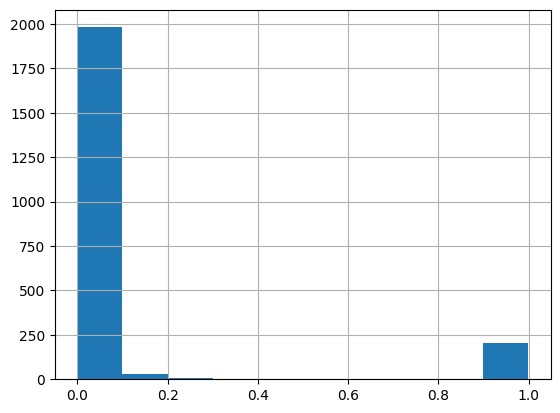

In [348]:
only_deaths_original.corrected_weights.hist()

In [349]:
only_deaths_original.corrected_weights.sum()

213.99763605039487

## Inverse percentage calculation (char_preds)

In [353]:
char_preds_original

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


In [354]:
char_preds_original.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [374]:
char_preds_droped_cols

['S.No',
 'pred',
 'actual',
 'alive',
 'plod',
 'isPopular',
 'culture',
 'dateOfBirth',
 'DateoFdeath',
 'age',
 'title',
 'mother',
 'father',
 'heir',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [357]:
char_preds_original.isna().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [359]:
char_preds_original.isAliveFather.value_counts(dropna=False)

NaN    1920
0.0      21
1.0       5
Name: isAliveFather, dtype: int64

In [360]:
char_preds_original.isAliveHeir.value_counts(dropna=False)

NaN    1923
1.0      15
0.0       8
Name: isAliveHeir, dtype: int64

In [361]:
char_preds_original.isAliveMother.value_counts(dropna=False)

NaN    1925
1.0      15
0.0       6
Name: isAliveMother, dtype: int64

In [362]:
char_preds_original.isAliveSpouse.value_counts(dropna=False)

NaN    1670
1.0     215
0.0      61
Name: isAliveSpouse, dtype: int64

In [373]:
char_preds_original.name.value_counts()

Viserys II Targaryen        1
Otho Bracken                1
Raymund Frey                1
Raynard Ruttiger            1
Red Alyn of the Rosewood    1
                           ..
Jon Cupps                   1
Jommy                       1
Jommo                       1
Johanna Swann               1
Tytos Lannister             1
Name: name, Length: 1946, dtype: int64

In [363]:
# Calculate frequency
frequency = char_preds_original['name'].value_counts()

# Calculate total observations
total_observations = len(char_preds_original)

# Calculate percentage of appearance
percentage_appearance = frequency / total_observations * 100

# Calculate inverse percentage
inverse_percentage = 100 - percentage_appearance

# Normalize weights to 
weights = inverse_percentage/100

# Map weights back to the original dataframe
char_preds_original['weights'] = char_preds_original['name'].map(weights)


In [369]:
char_preds_original

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,weights
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,NaN,0,0,NaN,11,1,1,0.605351,0,0.999486
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,1.0,1,1,97.0,1,1,1,0.896321,1,0.999486
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,0,1,NaN,0,0,0,0.267559,1,0.999486
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,0.0,1,1,23.0,0,0,0,0.183946,0,0.999486
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,1.0,1,1,29.0,0,0,0,0.043478,1,0.999486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,0,0,NaN,0,0,1,0.351171,0,0.999486
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.096990,0,0.999486
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.030100,1,0.999486
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,0,0,NaN,0,0,0,0.130435,1,0.999486


In [382]:
char_preds.isAlive.value_counts()

1    1451
0     495
Name: isAlive, dtype: int64

### Add isAlive column to only_deaths_with fill with 0 (because they are dead)

In [380]:
only_deaths.columns = ['Allegiance', 'Death No.', 'Episode', 'Killer', 'Killers House',
       'Location', 'Method', 'name', 'Season']

In [383]:
only_deaths['isAlive'] = 0

In [395]:
only_deaths

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1,0
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1,0
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1,0
...,...,...,...,...,...,...,...,...,...,...
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2222,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0


In [559]:
only_deaths_wo_deathno.columns

Index(['allegiance', 'killer', 'killers_house', 'location', 'method', 'name',
       'episode_global_num', 'weights_simple'],
      dtype='object')

In [ ]:
char_preds_aliveupdated_episodenum= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))

In [463]:
char_preds_merged_only_deaths= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))

In [451]:
char_preds_merged_only_deaths_case_insensitive= char_preds.merge(only_deaths['isAlive'], left_on=char_preds["name"].str.lower(), right_on=only_deaths["name"].str.lower(), how='left', suffixes=(None, '_y'))

In [447]:
char_preds_merged_only_deaths_case_insensitive

,key_0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,isAlive_y
0,viserys ii targaryen,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0,NaN
1,walder frey,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1,0.0
2,addison hill,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1,NaN
3,aemma arryn,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0,NaN
4,sylva santagar,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,luwin,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0,NaN
1943,reek,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0,NaN
1944,symeon star-eyes,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1,NaN
1945,coldhands,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1,NaN


In [412]:
only_deaths.isAlive.value_counts(dropna=False)

0    2224
Name: isAlive, dtype: int64

In [410]:
char_preds_merged_only_deaths.isAlive.value_counts(dropna=False)

1    1451
0     496
Name: isAlive, dtype: int64

In [448]:
char_preds_merged_only_deaths_case_insensitive.isAlive.value_counts(dropna=False)

1    1451
0     496
Name: isAlive, dtype: int64

In [411]:
char_preds_merged_only_deaths.isAlive_y.value_counts(dropna=False)

NaN    1830
0.0     117
Name: isAlive_y, dtype: int64

In [449]:
char_preds_merged_only_deaths_case_insensitive.isAlive_y.value_counts(dropna=False)

NaN    1830
0.0     117
Name: isAlive_y, dtype: int64

**Case-insensitive give the same results as without taking care of it...** (code is above)

In [465]:
# Creating the 'isAlive_updated' column
char_preds_merged_only_deaths['isAlive_updated'] = char_preds_merged_only_deaths.apply(lambda row: row['isAlive_y'] if (row['isAlive'] == 1 and row['isAlive_y'] == 0) else row['isAlive'], axis=1)


In [456]:
char_preds_merged_only_deaths.isAlive_updated.value_counts(dropna=False)

1.0    1393
0.0     554
Name: isAlive_updated, dtype: int64

In [457]:
char_preds_droped_cols

['S.No',
 'pred',
 'actual',
 'alive',
 'plod',
 'isPopular',
 'culture',
 'dateOfBirth',
 'DateoFdeath',
 'age',
 'title',
 'mother',
 'father',
 'heir',
 'spouse',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse']

In [458]:
char_preds_merged_only_deaths

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,isAlive_y,isAlive_updated
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0,NaN,0.0
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1,0.0,0.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1,NaN,1.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0,NaN,0.0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0,NaN,0.0
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0,NaN,0.0
1944,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1,NaN,1.0
1945,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1,NaN,1.0


In [459]:
char_preds_merged_only_deaths.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'isAlive_y', 'isAlive_updated'],
      dtype='object')

In [466]:
char_preds_merged_only_deaths_updated = char_preds_merged_only_deaths.drop(labels=['key_0','isAlive_y','isAlive'], axis=1)

In [468]:
char_preds_merged_only_deaths_updated.rename(columns={"isAlive_updated": "isAlive"},inplace=True)

In [557]:
char_preds_merged_only_deaths_updated

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0
1944,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0
1945,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0


In [443]:
#write csv isAlive_updated
#char_preds_merged_only_deaths_updated.to_csv('data/20231128_char_pred_isAlive_updated.csv')  

In [422]:
only_deaths.shape

(2224, 10)

In [423]:
only_deaths_original.shape

(2224, 11)

In [425]:
only_deaths_wo_deathno_nodupl.shape

(487, 8)

In [432]:
only_deaths_wo_deathno_nodupl.Name.value_counts(dropna=False)

Wildling                   32
Night's Watch brother      24
Lannister soldier          21
Sons of the Harpy agent    19
Peasant                    19
                           ..
Talisa Stark                1
Grey Wind                   1
Robb Stark                  1
Joyeuse Frey                1
Daenerys Targaryen          1
Name: Name, Length: 253, dtype: int64

In [431]:
only_deaths_wo_deathno_nodupl.Name.value_counts(dropna=False).value_counts()

1     221
2       9
4       5
3       5
19      2
10      2
32      1
24      1
21      1
18      1
17      1
16      1
12      1
8       1
7       1
Name: Name, dtype: int64

## Rui's scrapped houses data

In [529]:
scrapped_houses_data = pd.read_csv('data/ruis_data_house.csv')

In [530]:
scrapped_houses_data

,Character_Name,Culture,House_Allegiance,House_Region,Overlord_Name
0,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
1,Balon Greyjoy,NaN,NaN,NaN,NaN
2,Chayle,NaN,NaN,NaN,NaN
3,Gillam,NaN,NaN,NaN,NaN
4,High Septon,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2119,Zei,NaN,NaN,NaN,NaN
2120,Zekko,Dothraki,NaN,NaN,NaN
2121,Zharaq zo Loraq,Ghiscari,NaN,NaN,NaN
2122,Zollo,Dothraki,NaN,NaN,NaN


In [542]:
char_preds_original.shape

(1946, 34)

In [538]:
scrapped_houses_data.columns = ['name', 'Culture', 'House_Allegiance', 'House_Region',
       'Overlord_Name']

In [539]:
# Checking common values between scrapped_houses_data and only_deaths
common_values_scrap_onlydeaths = only_deaths[only_deaths['name'].isin(scrapped_houses_data['name'])]

# Values in scrapped_houses_data not in only_deaths
values_in_scrapped_not_in_only_deaths = scrapped_houses_data[~scrapped_houses_data['name'].isin(only_deaths['name'])]

# Values in only_deaths not in scrapped_houses_data
values_in_only_deaths_not_in_scrapped = only_deaths[~only_deaths['name'].isin(scrapped_houses_data['name'])]


In [540]:
common_values_scrap_onlydeaths

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1,0
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1,0
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1,0
...,...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8,0
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8,0
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8,0
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8,0


In [545]:
common_values_scrap_onlydeaths.name.value_counts()

Beric Dondarrion      2
Waymar Royce          1
Meryn Trant           1
Bowen Marsh           1
Arthur Dayne          1
                     ..
Hoster Tully          1
Doreah                1
Xaro Xhoan Daxos      1
Pyat Pree             1
Daenerys Targaryen    1
Name: name, Length: 116, dtype: int64

In [543]:
values_in_scrapped_not_in_only_deaths

,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
2,Chayle,NaN,NaN,NaN,NaN
3,Gillam,NaN,NaN,NaN,NaN
6,Melicent,NaN,NaN,NaN,NaN
7,Meribald,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2119,Zei,NaN,NaN,NaN,NaN
2120,Zekko,Dothraki,NaN,NaN,NaN
2121,Zharaq zo Loraq,Ghiscari,NaN,NaN,NaN
2122,Zollo,Dothraki,NaN,NaN,NaN


In [544]:
values_in_only_deaths_not_in_scrapped

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
3,None,4,1,Direwolf,None,Winterfell,Teeth,Stag,1,0
4,None,5,1,Stag,None,Winterfell,Antler,Direwolf,1,0
6,Dothraki,7,1,Dothraki man,Dothraki,Pentos,Arakh,Dothraki man,1,0
7,None,8,2,Summer,House Stark,Winterfell,Teeth,Catspaw assassin,1,0
9,House Stark,10,2,Ned Stark,House Stark,Kingsroad,Knife,Lady,1,0
...,...,...,...,...,...,...,...,...,...,...
2218,None,2206,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2219,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2220,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0
2221,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,0


In [548]:
char_preds.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [549]:
# Checking common values between scrapped_houses_data and char_preds
common_values_scrap_char_preds = char_preds[char_preds['name'].isin(scrapped_houses_data['name'])]

# Values in scrapped_houses_data not in char_preds
values_in_scrapped_not_in_char_preds = scrapped_houses_data[~scrapped_houses_data['name'].isin(char_preds['name'])]

# Values in char_preds not in scrapped_houses_data
values_in_char_preds_not_in_scrapped = char_preds[~char_preds['name'].isin(scrapped_houses_data['name'])]


In [612]:
scrapped_houses_data.head(4)

,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
1,Balon Greyjoy,NaN,NaN,NaN,NaN
2,Chayle,NaN,NaN,NaN,NaN
3,Gillam,NaN,NaN,NaN,NaN


In [550]:
common_values_scrap_char_preds

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,1
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1
5,Tommen Baratheon,1,No house,0,0,0,0,0,0,0,5,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Laena Velaryon,0,House Velaryon,0,0,0,0,0,1,0,0,0,0.140468,0
1941,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0
1943,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1
1944,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1


In [551]:
values_in_scrapped_not_in_char_preds

,name,Culture,House_Allegiance,House_Region,Overlord_Name
0,Walder,NaN,House Stark of Winterfell,The North,House Baratheon of King's Landing
4,High Septon,NaN,NaN,NaN,NaN
25,Aegon Frey,NaN,House Frey of the Crossing,The Riverlands,House Baelish of Harrenhal
26,Aegon Frey,NaN,House Frey of the Crossing,The Riverlands,House Baelish of Harrenhal
27,Aegon I,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2074,Wayn,Northmen,House Stark of Winterfell,The North,House Baratheon of King's Landing
2097,Willow,Free Folk,NaN,NaN,NaN
2104,Wyl,Northmen,House Stark of Winterfell,The North,House Baratheon of King's Landing
2105,Wyl,NaN,NaN,NaN,NaN


In [552]:
values_in_char_preds_not_in_scrapped

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0
7,Viserys I Targaryen,1,No house,0,0,0,0,0,0,0,5,1,0.678930,0
11,Will (orphan),0,No house,0,0,0,1,0,0,0,0,0,0.003344,1
12,Will (squire),1,No house,0,0,0,0,0,0,0,0,0,0.003344,1
13,Will (Standfast),0,House Osgrey,0,0,0,0,0,0,0,0,0,0.003344,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,Qarl the Maid,1,No house,0,1,1,1,1,0,0,0,0,0.066890,1
1893,Steelskin,1,House of Loraq,0,0,0,0,1,0,0,0,0,0.016722,1
1899,Damon Dance-for-Me,1,House Bolton,0,0,0,0,1,0,0,0,0,0.033445,1
1937,Symon Silver Tongue,1,No house,0,1,1,0,1,0,0,0,0,0.046823,0


In [555]:
common_values_onlydeaths_char_preds

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,name,Season,isAlive
0,Night's Watch,1,1,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0
1,Night's Watch,2,1,White Walker,None,Beyond the Wall,Ice sword,Gared,1,0
2,Night's Watch,3,1,Ned Stark,House Stark,Winterfell,Sword,Will,1,0
5,House Arryn,6,1,Lysa Arryn,House Arryn,King's Landing,Poison,Jon Arryn,1,0
8,Smallfolk,9,2,"Sandor ""the Hound"" Clegane",House Lannister,Kingsroad,Sword,Mycah,1,0
...,...,...,...,...,...,...,...,...,...,...
1979,House Lannister,2223,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Cersei Lannister,8,0
1980,House Lannister,2222,5,Daenerys Targaryen,House Targaryen,King's Landing,Rubble,Jaime Lannister,8,0
1981,House Lannister,1780,5,Grey Worm,House Targaryen,King's Landing,Spear,Harry Strickland,8,0
1995,House Targaryen,1380,5,Daenerys Targaryen,House Targaryen,Dragonstone,Dragonfire (Dragon),Varys,8,0


In [561]:
char_preds_merged_only_deaths_updated

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0
2,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0
4,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0
1944,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0
1945,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0


# Wednesday 29

In [609]:
char_preds_raw = pd.read_csv('data/archive/character-predictions.csv')

In [610]:
char_preds_raw.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [575]:
only_deaths_episode_updated = only_deaths_wo_deathno.copy()

In [576]:
char_preds_isAlive_updated = char_preds_merged_only_deaths_updated.copy()

In [611]:
char_preds_isAlive_updated.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [578]:
only_deaths_episode_updated.shape

(2224, 8)

In [580]:
char_preds_isAlive_updated.shape

(1947, 14)

In [581]:
# Checking common values between only_deaths_episode_updated and char_preds_isAlive_updated
common_values_between_onlydeathsUp_charpredsUP = char_preds_isAlive_updated[char_preds_isAlive_updated['name'].isin(only_deaths_episode_updated['name'])]

# Values in only_deaths_episode_updated not in char_preds_isAlive_updated
values_in_onlydeathsUp_in_charpredsUP = only_deaths_episode_updated[~only_deaths_episode_updated['name'].isin(char_preds_isAlive_updated['name'])]

# Values in char_preds_isAlive_updated not in only_deaths_episode_updated
values_in_charpredsUP_onlydeathsUp = char_preds_isAlive_updated[~char_preds_isAlive_updated['name'].isin(only_deaths_episode_updated['name'])]


In [593]:
new_line = '\n'
print(f"In common= {common_values_between_onlydeathsUp_charpredsUP.shape[0]}, {new_line} Values in only_deaths_episode_updated not in char_preds_isAlive_updated {values_in_onlydeathsUp_in_charpredsUP.shape[0]}, {new_line} Values in char_preds_isAlive_updated not in only_deaths_episode_updated {values_in_charpredsUP_onlydeathsUp.shape[0]}" )

In common= 117, 
 Values in only_deaths_episode_updated not in char_preds_isAlive_updated 2107, 
 Values in char_preds_isAlive_updated not in only_deaths_episode_updated 1830


In [596]:
char_preds_isAlive_updated.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive'],
      dtype='object')

In [597]:
only_deaths_episode_updated.columns

Index(['allegiance', 'killer', 'killers_house', 'location', 'method', 'name',
       'episode_global_num', 'weights_simple'],
      dtype='object')

In [598]:
char_preds_UP_merged_only_deaths_UP= char_preds_isAlive_updated.merge(only_deaths_episode_updated['episode_global_num'], left_on=char_preds_isAlive_updated["name"].str.lower(), right_on=only_deaths_episode_updated["name"].str.lower(), how='left', suffixes=(None, '_y'))

In [599]:
char_preds_UP_merged_only_deaths_UP

,key_0,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,viserys ii targaryen,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,walder frey,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,addison hill,Addison Hill,1,House Swyft,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,aemma arryn,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,sylva santagar,Sylva Santagar,0,House Santagar,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,luwin,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1945,reek,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1946,symeon star-eyes,Symeon Star-Eyes,1,No house,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1947,coldhands,Coldhands,1,Three-eyed crow,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


In [601]:
char_preds_UP_merged_only_deaths_UP.episode_global_num.notna().sum()

119

In [602]:
char_preds_UP_merged_only_deaths_UP.drop('key_0',axis=1, inplace=True)

In [603]:
char_preds_UP_merged_only_deaths_UP.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num'],
      dtype='object')

In [606]:
char_preds_UP_merged_only_deaths_UP.duplicated().sum()

2

In [638]:
char_preds_UP_merged_only_deaths_UP[char_preds_UP_merged_only_deaths_UP.duplicated(keep=False)]

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
1658,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,24.0
1659,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,70.0
1660,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,24.0
1661,Beric Dondarrion,1,No house,1,1,1,1,1,0,1,0,0,0.434783,0.0,70.0


In [640]:
char_preds_UP_merged_only_deaths_UP.drop_duplicates(inplace=True)

In [642]:
char_preds_UP_merged_only_deaths_UP.duplicated().sum()

0

In [604]:
char_preds_UP_merged_only_deaths_UP.isna().sum()

name                     0
male                     0
house                    0
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
dtype: int64

In [607]:
char_preds_UP_merged_only_deaths_UP.house.value_counts(dropna=False)

No house           430
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 348, dtype: int64

In [608]:
char_preds_UP_merged_only_deaths_UP.isAlive.value_counts(dropna=False)

1.0    1393
0.0     556
Name: isAlive, dtype: int64

## Checking houses file from Franziska

In [615]:
char_preds_raw.columns

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [616]:
origins_table = pd.read_csv('/Users/Carmen/code/CarmenSC/test_GoT/game-of-thrones-survival/features_for_quiz/houses/origins.txt')

In [617]:
origins_table

,culture,house,origin
0,NaN,Alchemists' Guild,Noble
1,NaN,Antler Men,Peasant
2,Tyroshi,Band of Nine,Foreign Peasant
3,NaN,Black Ears,Peasant
4,Vale mountain clans,Black Ears,Outlaw
...,...,...,...
482,Tyroshi,NaN,Foreign Noble
483,Valyrian,NaN,Foreign Peasant
484,Westeros,NaN,Peasant
485,Wildlings,NaN,Wildling


In [619]:
char_preds_house_culture = char_preds_raw[['name', 'culture','house']]

In [622]:
char_preds_house_culture

,name,culture,house
0,Viserys II Targaryen,NaN,NaN
1,Walder Frey,Rivermen,House Frey
2,Addison Hill,NaN,House Swyft
3,Aemma Arryn,NaN,House Arryn
4,Sylva Santagar,Dornish,House Santagar
...,...,...,...
1941,Luwin,Westeros,House Stark
1942,Reek,NaN,House Bolton
1943,Symeon Star-Eyes,NaN,NaN
1944,Coldhands,NaN,Three-eyed crow


In [623]:
char_preds_house_culture['res'] = 0

/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_1751/3067006389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_preds_house_culture['res'] = 0


In [624]:
char_preds_house_culture

,name,culture,house,res
0,Viserys II Targaryen,NaN,NaN,0
1,Walder Frey,Rivermen,House Frey,0
2,Addison Hill,NaN,House Swyft,0
3,Aemma Arryn,NaN,House Arryn,0
4,Sylva Santagar,Dornish,House Santagar,0
...,...,...,...,...
1941,Luwin,Westeros,House Stark,0
1942,Reek,NaN,House Bolton,0
1943,Symeon Star-Eyes,NaN,NaN,0
1944,Coldhands,NaN,Three-eyed crow,0


In [630]:
result_df = char_preds_house_culture.merge(origins_table, on=['culture', 'house'], how='left')


In [631]:
result_df

,name,culture,house,res,origin
0,Viserys II Targaryen,NaN,NaN,0,NaN
1,Walder Frey,Rivermen,House Frey,0,House Frey
2,Addison Hill,NaN,House Swyft,0,House Lannister
3,Aemma Arryn,NaN,House Arryn,0,House Arryn
4,Sylva Santagar,Dornish,House Santagar,0,House Martell
...,...,...,...,...,...
1941,Luwin,Westeros,House Stark,0,House Stark
1942,Reek,NaN,House Bolton,0,House Bolton
1943,Symeon Star-Eyes,NaN,NaN,0,NaN
1944,Coldhands,NaN,Three-eyed crow,0,Peasant


In [635]:
result_df.origin.value_counts(dropna=False),result_df.origin.value_counts(dropna=False).count()

(NaN                244
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: origin, dtype: int64,
 21)

In [636]:
char_preds_raw.house.value_counts(dropna=False), char_preds_raw.house.value_counts(dropna=False).count()

(NaN                427
 Night's Watch      105
 House Frey          97
 House Stark         72
 House Targaryen     62
                   ... 
 House Gower          1
 House Borrell        1
 Citadel              1
 Wise Masters         1
 Three-eyed crow      1
 Name: house, Length: 348, dtype: int64,
 348)

In [ ]:
char_preds_UP_merged_only_deaths_UP

Now fill using our current and most updated dataset char_preds_UP_merged_only_deaths_UP, merge by name

In [643]:
char_preds_UP_merged_only_deaths_UP_origin= char_preds_UP_merged_only_deaths_UP.merge(result_df['origin'], left_on=char_preds_UP_merged_only_deaths_UP["name"].str.lower(), right_on=result_df["name"].str.lower(), how='left', suffixes=(None, '_y'))

In [653]:
char_preds_UP_merged_only_deaths_UP_origin.drop(labels=['key_0'], axis=1, inplace=True)

In [687]:
char_preds_UP_merged_only_deaths_UP_origin.columns

Index(['name', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num', 'origin'],
      dtype='object')

In [688]:
char_preds_UP_merged_only_deaths_UP_origin = char_preds_UP_merged_only_deaths_UP_origin[['name', 'male', 'origin','book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num']]

In [690]:
#char_preds_UP_merged_only_deaths_UP_origin.drop(labels=['house'], axis=1, inplace=True)

#write new csv

#char_preds_UP_merged_only_deaths_UP_origin.to_csv('data/20231129_char_preds_origin_episode_isAlive.csv')

In [693]:
char_preds_UP_merged_only_deaths_UP_origin

,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1944,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1945,Coldhands,1,Peasant,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


In [692]:
!ls data

20231127_char_pred.csv
20231128_char_pred_isAlive_updated.csv
20231128_only_deaths_ep_weights.csv
20231129_char_preds_origin_episode_isAlive.csv
archive
game-of-thones-deaths.xlsx
only_dead.xlsx
ruis_data_house.csv


In [649]:
char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False).count(),new_line ,char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False) 

(21,
 '\n',
 NaN                245
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: origin, dtype: int64)

In [650]:
char_preds_UP_merged_only_deaths_UP_origin.isna().sum()

key_0                    0
name                     0
male                     0
house                    0
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
origin                 245
dtype: int64

In [655]:
char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['origin'].isna()]


,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num,origin
0,Viserys II Targaryen,1,No house,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN,NaN
5,Tommen Baratheon,1,No house,0,0,0,0,0,0,0,5,1,1.000000,0.0,60.0,NaN
7,Viserys I Targaryen,1,No house,0,0,0,0,0,0,0,5,1,0.678930,0.0,NaN,NaN
8,Wilbert,1,No house,0,0,1,0,0,0,1,0,0,0.006689,0.0,NaN,NaN
11,Will (orphan),0,No house,0,0,0,1,0,0,0,0,0,0.003344,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,Shae,0,No house,1,1,1,1,1,0,0,0,0,0.290970,0.0,40.0,NaN
1866,Vyman,0,No house,1,1,1,1,1,0,1,0,0,0.040134,1.0,NaN,NaN
1901,Alysanne Targaryen,0,No house,0,0,0,0,0,0,0,0,0,0.277592,0.0,NaN,NaN
1938,Symon Silver Tongue,1,No house,0,1,1,0,1,0,0,0,0,0.046823,0.0,NaN,NaN


In [657]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin'].\
 isna()].name.unique()


array(['Viserys II Targaryen', 'Tommen Baratheon', 'Viserys I Targaryen',
       'Wilbert', 'Will (orphan)', 'Will (squire)', 'Willam', 'Willifer',
       'Willum', 'Woth', 'Wyl the Whittler', 'Wun Weg Wun Dar Wun',
       'Yormwell', 'Ysilla', 'Zarabelo', 'Zei', 'Joffrey Baratheon',
       'Maegor I Targaryen', 'Qyle', 'Rafe', 'Rainbow Knight', 'Randa',
       'Rawney', 'Redtusk', 'Reysen', 'Rigney', 'Robb Stark', 'Robin',
       'Roger of Pennytree', 'Rolfe', 'Roone', 'Roone (maester)', 'Rosey',
       'Runciter', 'Ryam', 'Saathos', 'Scarb', 'Sedgekins', 'Sharna',
       'Shella', 'Sherrit', 'Sky Blue Su', 'Stannis Baratheon',
       'Tansy (orphan)', 'Tarber', 'Theobald', 'Timon', 'Todric',
       'Tothmure', 'Tristifer V Mudd', 'Tristifer IV Mudd', 'Tuffleberry',
       'Turquin', 'Urreg', 'Uthor Underleaf', 'Vaellyn', 'Violet',
       'Wat (orphan)', 'Wat (sailor)', 'Weasel', 'Addam',
       'Aegon I Targaryen', 'Aegon II Targaryen', 'Aegon IV Targaryen',
       'Aenys I Targaryen

In [658]:
char_preds_UP_merged_only_deaths_UP_origin.columns

Index(['name', 'male', 'house', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations',
       'popularity', 'isAlive', 'episode_global_num', 'origin'],
      dtype='object')

In [659]:
char_preds_UP_merged_only_deaths_UP_origin.house.value_counts()

No house           428
Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 348, dtype: int64

In [661]:
#char_preds_UP_merged_only_deaths_UP_origin['origin2'] = char_preds_UP_merged_only_deaths_UP_origin.apply(lambda row: row['house'] if pd.isna(row['origin']) and row['house'] != 'Not house' else row['origin'], axis=1)


In [677]:
#char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False).count(), char_preds_UP_merged_only_deaths_UP_origin.origin.value_counts(dropna=False)

(21,
 NaN                245
 House Tyrell       172
 House Stark        161
 House Greyjoy      140
 House Lannister    134
 House Frey         132
 Noble              117
 House Baratheon    107
 Night's Watch      105
 House Targaryen     88
 Foreign Peasant     88
 House Arryn         75
 House Martell       74
 House Tully         71
 Outlaw              68
 Wildling            66
 Foreign Noble       36
 Soldier             26
 Dothraki            18
 Peasant             16
 House Bolton         8
 Name: origin, dtype: int64)

In [679]:
char_preds_UP_merged_only_deaths_UP_origin\
[char_preds_UP_merged_only_deaths_UP_origin['origin2'].\
 is('No house')].name.unique()

array([], dtype=object)

In [680]:
no_house_rows = char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['origin2'] == 'No house']


In [713]:
type(no_house_rows.name.unique()[0])

str

In [725]:
char_preds_UP_merged_only_deaths_UP_origin['origin'].notnull().sum()

1702

In [733]:
n_ = 0
for index, row in char_preds_UP_merged_only_deaths_UP_origin.iterrows():
    if row['origin'] == nan:
        print(row['name'])

NameError: name 'nan' is not defined

In [696]:
char_preds_UP_merged_only_deaths_UP_origin

,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
2,Addison Hill,1,House Lannister,0,0,0,1,0,0,1,0,0,0.267559,1.0,NaN
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
4,Sylva Santagar,0,House Martell,0,0,0,1,0,1,1,0,0,0.043478,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN
1944,Symeon Star-Eyes,1,NaN,1,1,1,1,1,0,0,0,0,0.030100,1.0,NaN
1945,Coldhands,1,Peasant,0,0,1,1,1,0,0,0,0,0.130435,1.0,NaN


In [698]:
filtered_only_dead = char_preds_UP_merged_only_deaths_UP_origin[char_preds_UP_merged_only_deaths_UP_origin['isAlive']==0]

In [704]:
filtered_only_dead

,name,male,origin,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,boolDeadRelations,popularity,isAlive,episode_global_num
0,Viserys II Targaryen,1,NaN,0,0,0,0,0,0,0,11,1,0.605351,0.0,NaN
1,Walder Frey,1,House Frey,1,1,1,1,1,1,1,1,1,0.896321,0.0,60.0
3,Aemma Arryn,0,House Arryn,0,0,0,0,0,1,1,0,0,0.183946,0.0,NaN
5,Tommen Baratheon,1,NaN,0,0,0,0,0,0,0,5,1,1.000000,0.0,60.0
6,Valarr Targaryen,1,House Targaryen,0,0,0,0,0,1,1,0,0,0.431438,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,Symon Silver Tongue,1,NaN,0,1,1,0,1,0,0,0,0,0.046823,0.0,NaN
1941,Laena Velaryon,0,Foreign Noble,0,0,0,0,0,1,0,0,0,0.140468,0.0,NaN
1942,Luwin,1,House Stark,1,1,1,1,1,0,0,0,0,0.351171,0.0,NaN
1943,Reek,1,House Bolton,0,1,0,1,1,0,0,0,0,0.096990,0.0,NaN


In [701]:
#write new csv

#filtered_only_dead.to_csv('data/20231129_char_preds_filtered_only_dead.csv')

In [702]:
!ls data

20231127_char_pred.csv
20231128_char_pred_isAlive_updated.csv
20231128_only_deaths_ep_weights.csv
20231129_char_preds_filtered_only_dead.csv
20231129_char_preds_origin_episode_isAlive.csv
archive
game-of-thones-deaths.xlsx
only_dead.xlsx
ruis_data_house.csv


In [705]:
char_preds_UP_merged_only_deaths_UP_origin.isna().sum()

name                     0
male                     0
origin                 245
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
isMarried                0
isNoble                  0
numDeadRelations         0
boolDeadRelations        0
popularity               0
isAlive                  0
episode_global_num    1830
dtype: int64

In [708]:
houses_list = pd.read_csv('/Users/Carmen/code/CarmenSC/test_GoT/game-of-thrones-survival/features_for_quiz/houses/potential_classes.txt',header= None )

In [709]:
houses_list

,0
0,Wildling
1,Night's Watch
2,Dothraki
3,Foreign Noble
4,Foreign Peasant
5,Noble
6,Peasant
7,Outlaw
8,Soldier
9,House Bolton
